In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


Load DataSet and preprocessing

In [103]:
df=pd.read_csv(r'data\telco_customer_churn.csv.csv')
df.drop(columns=['customerID'],inplace=True)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

binary_map={'Yes':1,'No':0,'Male':1,'Female':0}
for col in ['Partner','gender','Dependents','PhoneService','PaperlessBilling','Churn']:
 df[col]=df[col].map(binary_map)
 mul_cat_col=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
df=pd.get_dummies(df,columns=mul_cat_col,drop_first=True)
print(df.head())
print(df.dtypes)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            False                    

Train/Test Split

In [111]:
df = df.dropna()
x=df.drop('Churn',axis=1)
y=df['Churn']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Train Model

In [ ]:
model= LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

c:\Users\DEll\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluate

In [112]:
Y_pred =model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy: 0.7853589196872779
[[917 116]
 [186 188]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.79      0.78      1407



Visualization

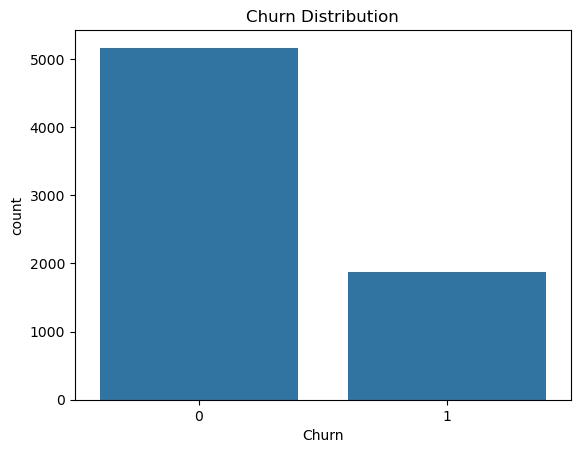

In [113]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.savefig('images/churn_distribution.png')
plt.show()